# Module 01: Empirical Analysis

CSCI304: Analysis and Design of Algorithms<br>
Nile University<br>
Ammar Sherif

## Outline

1. [What are Algorithms?](#What-are-Algorithms?)
2. [Categories of Algorithm Analysis](#Categories-of-Algorithm-Analysis:)
3. [Steps to do Empirical Analysis](#Steps-to-do-Empirical-Analysis)
5. [Example 01: Fibonacci Numbers](#Example-01:-Fibonacci-Numbers)
    - [Growth Curve](#Part-II:-Growth-Curve)
6. [Example 02: Enhanced Fibonacci](#Example-02:-Enhance-your-the-algorithm)
    - [Growth Curve](#Validate-your-enhancement)
8. [Exercise](#Exercise)

## What are Algorithms?

We start our module with that question. Briefly, algorithms are just a **sequence of steps** that performs something; typically, these steps solve some problem. For example, there are steps to prepare a cup of coffee. These steps make what is called an algorithm. Some other examples from CS include:
- Sorting a list of items
- Searching for an item in a list
- Encrypting some text
- Multiplying matrices

Having introduced the concept of algorithms, we can explain which things we are interested in regarding them. As indicated by the name, we are interested in both the **analysis** and **design** of the algorithms. The first part starting from this module deals with the analysis. Then, starting from Module 3, we introduce some of the design principles. Now, what kind of analysis are we interested in?

When we have an algorithm, we are typically interested in two things:
- make sure it is **correct**
- how much **faster** is it compared to some other algorithms?

The analysis of algorithms focus on both of these points. The first makes sure that our code (algorithm) does what is meant to be done. The seconds tries to compare between different algorithms

## Categories of Algorithm Analysis:

To do both of the two tasks, we have two approaches:
- Theoretical:
    - requires math model
    - more accurate
    - hardware independent
    - hard to do for complex problems
- Empirical:
    - monitor the time when varying the input size
    - approximation
    - measurement [time, #operations]
    - *quite* hardawre dependent

For example, we often do the empirical analysis for the **correctness**, which is the testing phase after the development. Empirically, we make sure our algorithm (program) is correct by testing it on a *predefined inputs*. Then, we compare the algorithm result against what we are expecting. **Module 2** talks about the theoretical analysis. During this module, we are more interested in the empirical analysis of testing **how fast is this algorithm?**

## Steps to do Empirical Analysis

Empirical analysis to test how fast is an algorithm is sometimes mentioned as the **Growth Curves** of the algorithm. In general, we try to answer the below question: *If there were a **change** in the **problem size**, how that would affect the time the algorithm takes*

For example, if our problem takes a list of items, if we increased the number of items to be 1000 instead of 100, how the time will grow in that case? There might be lots of answers: linear that means the increase in time would be proportional to that in size. Quadratic means the increase in time would be quadratically proportional to the increase in size, and so on. Therefore, the first step is

1. Determine the **problem size**.<br>
Is it the size of your list, number of items? Or is it the value the algorithm takes, like the below example? Does your algorithm take a matrix as an input, so the size consists of the number of rows and columns? or what? During this step, we understand our problem in more depth. 
2. Now knowing what the size is, we would like to change it an see how the time would change.
    - We do this by **increasing problem size**.
    - Every time we increase it, we **generate an input** with that particular size
    - Now, we give that input to our algorithm, and calculate the **time** it takes for it
    - Finally, record these times as you keep increasing the problem size
3. The last step is to plot the curve of your algorithm such that
    - The x-axis represents the problem size
    - The y-axis represents the time your algorithm takes to solve a problem with such size
    - Such graph characterizes your algorithm. It typicall gives you an intuition to the running time your algorithm will take to process an input of a particular size.
    - Having graphs to different algorithms that do the same thing, we can compare them by comparing their **growth curves**.

Of course, as previously mentioned, there are some concerns as below:
- During the empirical analysis, you are measuring time. Therefore, the resulting curve depends on **how you are measuring it**. For example, measuring time on top of python might reduce lots of oscillations in our growth curve as we will see. This is because our measurement procedure is **not** that **accurate**. Therefore, we can measure the time of one call, yet this might include all the other running procedures in the kernel level that are irrelevant to our algorithm, yet they consume some time.  
- We can handle this issue by measuring the time of a particular input size many times, and we take the **average**. This should make our predictions more accurate.
- Furthermore, we might also **count the number of operations** rather than measuring the time. This would be more accurate, but it might be hard sometimes

In general, during the next modules, we only do empirical analysis to have an intuition over the growth curve to help us during the theoretical analysis, so we do *not perform sophistacted measurement procedures* to make our curves more accurate. Let us try to do this for the following problem.

Nevertheless, before proceeding to [our example](#Example-01:-Fibonacci-Numbers), we need to know how to plot using python. Therefore, kindly check out this helpful [notebook](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) from J.R. Johansson. Feel free to **skip that section** if you already know it.

## Example 01: Fibonacci Numbers

Now, we are ready to proceed to our example. Lots of mathematicians and computer scientists love Fibonacci numbers. They are used in many applications—one of them is in Algorithm analysis in addition to various useful algorithms inspired from the sequence.

The sequence goes as follows:
$$0,1,1,2,3,5,8,13,\cdots,F_n,\cdots$$
That can obviously be seen to follow the below equations:
\begin{align*}
    F_0 &=0\\
    F_1 &=1\\
    {{\color{red}{F_n}}} &= F_{n-1} + F_{n-2}
\end{align*}

You are __required__ to implement the `fibonacci(n,rc)` that should return the $n^{th}$ fibonacci number based on the above relations.

__Inputs:__ 
\begin{align*}
    n &\in \mathbb{Z}: \quad 0 \leq n \leq 40\\
    \text{rc} &\text{ : the number of recursive calls so far}
\end{align*}

__Outputs:__
\begin{align*}
    v &\text{ : the value of }F_n\\
    \text{rc} &\text{ : the number of recursive calls representing the } \textit{cost}\\
\end{align*}

### Part I: Recursive Implementation

In [1]:
def fibonacciVal(n):
    """
    computes the nth fibonacci number
    ==================================================================
    Inputs:
    [-]  n: represnts the value n for  which we would like to  compute
            the corresponding fibonacci value
    
    Output:
    [-] fn: represents the nth fibonacci value
    ==================================================================
    """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        a = fibonacciVal(n-1)
        b = fibonacciVal(n-2)
        return a + b
        # return fibonacciVal(n-1) + fibonacciVal(n-2)

Q: Show the value of $F_{30}$  (is it 854061?)

In [2]:
fibonacciVal(30)

832040

### Part II: Growth Curve 

We proceed in accordance to the previously mentioned steps to do our empirical analysis as below:
1. Problem size: the problem size is the scaler value $n$
2. Vary the size and generate a punch of inputs, and measure the time<br>
   We do this step in the loop
3. Plot the size against time

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time

In [4]:
times = []
# ====================================================================
# Step 2: varying the problem size, and generating inputs. Each  iter-
# ation of the loop generates a value of n, which is a  problem. Then,
# we compute the time our algorithm takes to compute f(n) and store it
# in the times list.
# ====================================================================
for n in range(31):
    start_time = time.time()
    fibonacciVal(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times.append(execution_time_ns)

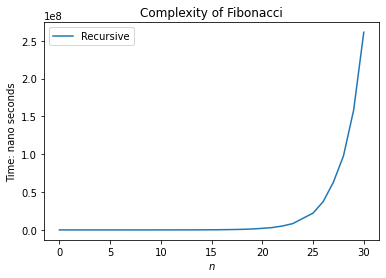

In [5]:
# ====================================================================
# Step 3: plotting the growth curve
# ====================================================================
f,ax = plt.subplots()
ax.plot(range(31),times,label='Recursive')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Fibonacci')
ax.legend(loc=0);

### Part III: Returning the Number of Recursive Calls

As we previously mentioned, measuring time like that might be not that accurate. For example, even if it is not that obvious, we can see that the curve declines after 20 for some reason. So we try to count the number of operations, **recursive calls**, instead. In this section, we will try to modify the code to count the number of operations it takes to compute $f_n$

<center><img src="recursive.svg" width="600"></center>

<!-- Image code in latex -->
<!-- \definecolor{lightgreen}{rgb}{0.56, 0.93, 0.56}
\definecolor{apricot}{rgb}{0.98, 0.81, 0.69}

$$\underbrace{\Tree[.{f(n) \colorbox{lightgreen}{1}} {f(n-1) \colorbox{lightgreen}{n}} {f(n-2) \colorbox{lightgreen}{m}} ]}_{1+n+m} \implies \Tree[.{f(n) \colorbox{lightgreen}{1}} [.{f(n-1) \colorbox{apricot}{1}} {f(n-2) \colorbox{lightgreen}{n_1}} {f(n-3) \colorbox{lightgreen}{n_2}} ] {f(n-2) \colorbox{lightgreen}{m}} ]$$ -->

As could be seen from the image, and the below equations, the number of calls (rc) equals that particular call, $1$, plus the number of calls in the left subtrees, $n$, and the number of calls in the right subtrees, $m$. Also, using the same recursive procedure, we count the number of calls in the left and right subtrees using the same **recursive procedure**&mdash;this continues until reaching a *base case*. Please, view the below *examples*.

\begin{align*}
    \text{Total number of calls (rc)} &= 1 + n + m\\
    &= 1 + (1 + n_1 + n_2) + m\\
    &= 1 + \cdots
\end{align*}

<center><img src="recurrenceExample.svg" width="600"></center>

\begin{align*}
    rc_3 &= \underbrace{1}_{f(3)\text{ itself}} + \overbrace{m}^{f(2)} + \underbrace{1}_{f(1)}\\
    &= 1 + (1 + 1 + 1) + 1\\
    &= \boxed{5}
\end{align*}

In [6]:
def fibonacci(n, rc = 1):
    """
    computes the nth fibonacci number
    
    It takes
     n: represnts the nth value in the sequence
    rc: represents the number of recursive calls [as an evaluation to the performance]
    
    It should return 
    [-] the value of the nth fibonacci number
    [-] the number of required recursive calls
    """
    if n == 0:
        return 0, rc
    elif n == 1:
        return 1, rc
    else:
        a, rc1 = fibonacci(n-1, rc + 1)
        b, rc2 = fibonacci(n-2, rc1 + 1)
        return a+b, rc2

Q: Show the value of $F_{30}$  (is it 854061?)

In [7]:
print(fibonacci(30))

(832040, 2692537)


You are required to show the growth rate of your algorithm. <br>
__Plot__ the number of required operations __vs__ the value of $n$

In [8]:
# Evaluate the value of your function at various inputs: x
x = range(31)
y = [fibonacci(i)[1] for i in x]

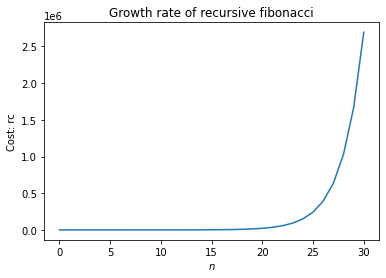

In [9]:
f, ax = plt.subplots()
ax.plot(x,y,label='#operations')
ax.set_xlabel('$n$')
ax.set_ylabel('Cost: rc')
ax.set_title('Growth rate of recursive fibonacci');

## Example 02: Enhance your the algorithm

__Enhanced Fibonacci__ <br>
Now, you are required to implement a better algorithm for computing fibonacci numbers with the same requirements

In [10]:
def fibonacci2(n):
    """
    computes the nth fibonacci number
    
    It takes
     n: represnts the nth value in the sequence
    
    It should return 
    [-] the value of the nth fibonacci number
    [-] the number of required operations
    """
    if n == 0:
        return 0,1
    elif n == 1:
        return 1,1
    else:
        current  = 1
        previous = 0
        # Loop from 2, up to n inclusive
        # range execludes the last value, n+1
        for i in range(2,n+1):
            temp = current
            current = temp + previous
            previous = temp
        return current, n

Q: Show the value of $F_{20}$  (is it 6765?)

In [11]:
fibonacci2(20)

(6765, 20)

Do not worry if you did not manage to enhance it on your own. You will learn all of this during the design modules. Above, we used the concepts from Dynamic Programming in Module 5.

### Validate your enhancement

You are required to show the growth rate of your algorithms. <br>
__Plot__ the number of required operations __vs__ the value of $n$ for the **two algorithms** in a *single figure*, so we could confirm your enhancement

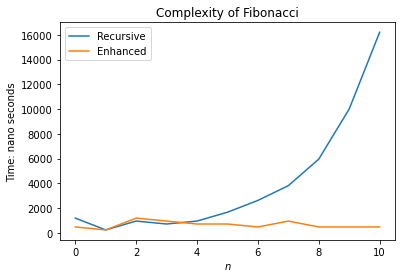

In [12]:
times1 = []
times2 = []
# ====================================================================
# Step 2: varying the problem size, and generating inputs. Each  iter-
# ation of the loop generates a value of n, which is a  problem. Then,
# we compute the time our algorithm takes to compute f(n) and store it
# in the times list.
# ====================================================================
for n in range(11):
    start_time = time.time()
    fibonacciVal(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times1.append(execution_time_ns)
    
    
    start_time = time.time()
    fibonacci2(n)
    # Total time = end - start
    execution_time_ns = (time.time() - start_time)*(10**9)
    times2.append(execution_time_ns)
# ====================================================================
# Step 3: plotting the growth curve
# ====================================================================
f,ax = plt.subplots()
ax.plot(range(11),times1,label='Recursive')
ax.plot(range(11),times2,label='Enhanced')
ax.set_xlabel('$n$')
ax.set_ylabel('Time: nano seconds')
ax.set_title('Complexity of Fibonacci')
ax.legend(loc=0);

**Notice** as we previously mentioned that although the enhanced, iterative, curve is generally better. It is obvious that the measurement is not that accurate, as both keeps **oscillating**. Therefore, we compare the number of operations between both next. 

In [13]:
# Evaluate your two implemented algorithms
x = range(11)
y1 = [fibonacci(i)[1] for i in x]
y2 = [fibonacci2(i)[1] for i in x]

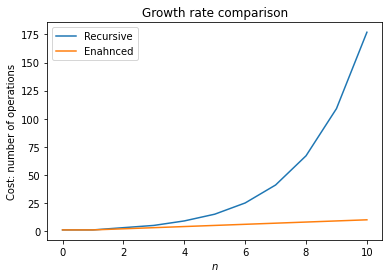

In [14]:
# Plot the two rates in the same figure
f,ax = plt.subplots()
ax.plot(x,y1,label='Recursive')
ax.plot(x,y2,label='Enahnced')
ax.set_xlabel('$n$')
ax.set_ylabel('Cost: number of operations')
ax.set_title('Growth rate comparison')
ax.legend(loc=0);

Now we are sure that the enhanced algorithm is faster, so we would typically use it in production rather than the first one. You might try to do empirical analysis to various functions you have written to get used to the concept

## Exercise
Now, you might want to see if you can do an empirical analysis in these exercises, [E1](./Exercises/E1.ipynb) and [E2](./Exercises/E2.ipynb), as a practice exercise.